# Proximity Matrix Visualizations

This notebook visualizes proximity matrices from different methods. It includes:
1. MDS scatter plots colored by class label.
2. Heatmaps of the proximity matrices, sorted by class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)


--- QGAP ---
Matrix shape: (496, 496)


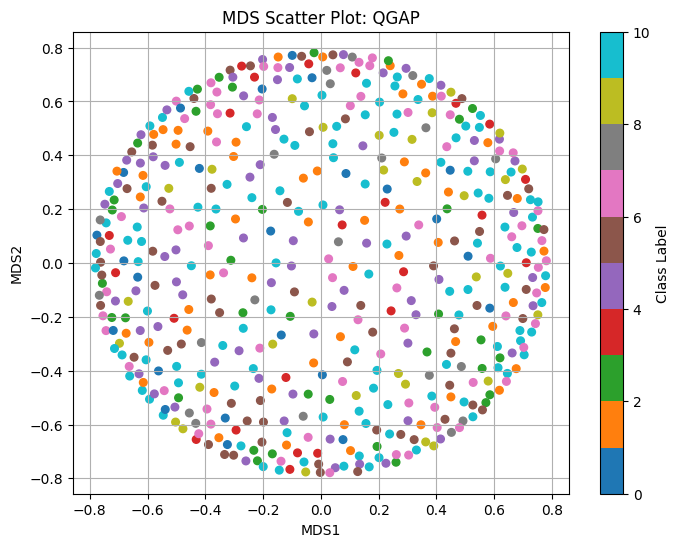

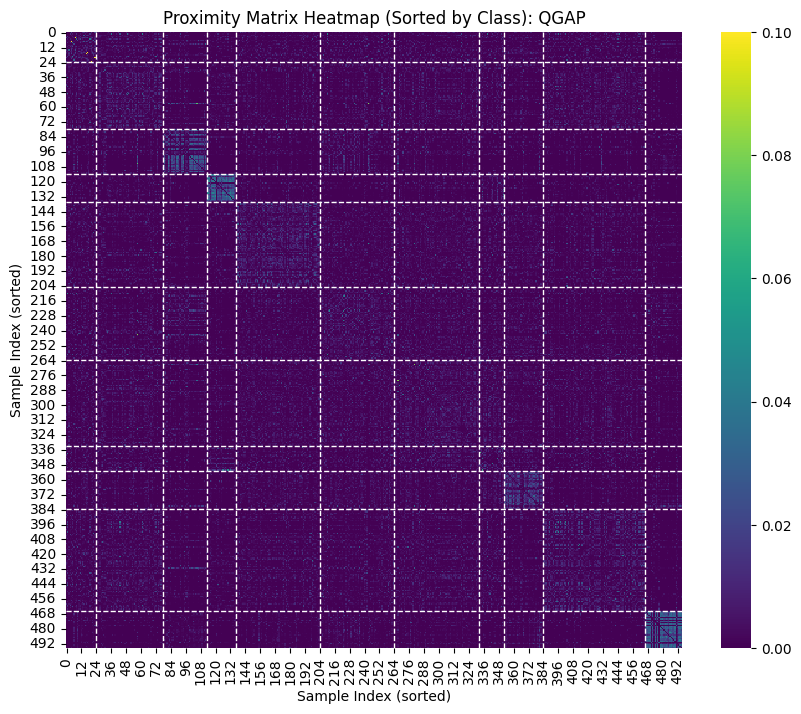


--- REDCOMETS ---
Matrix shape: (496, 496)


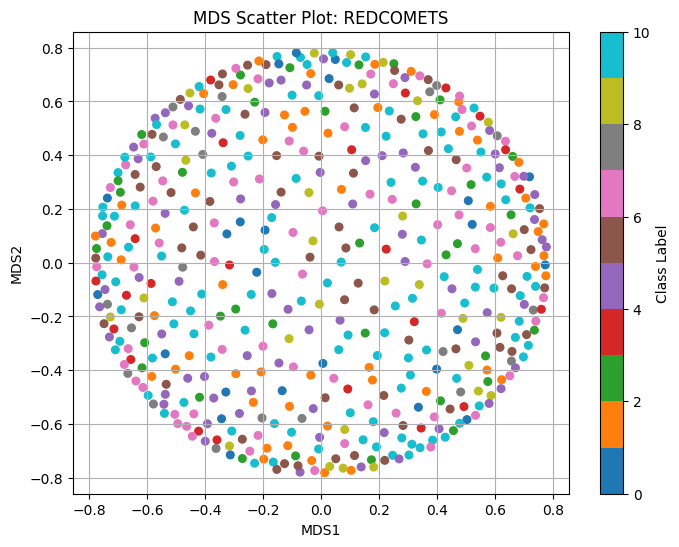

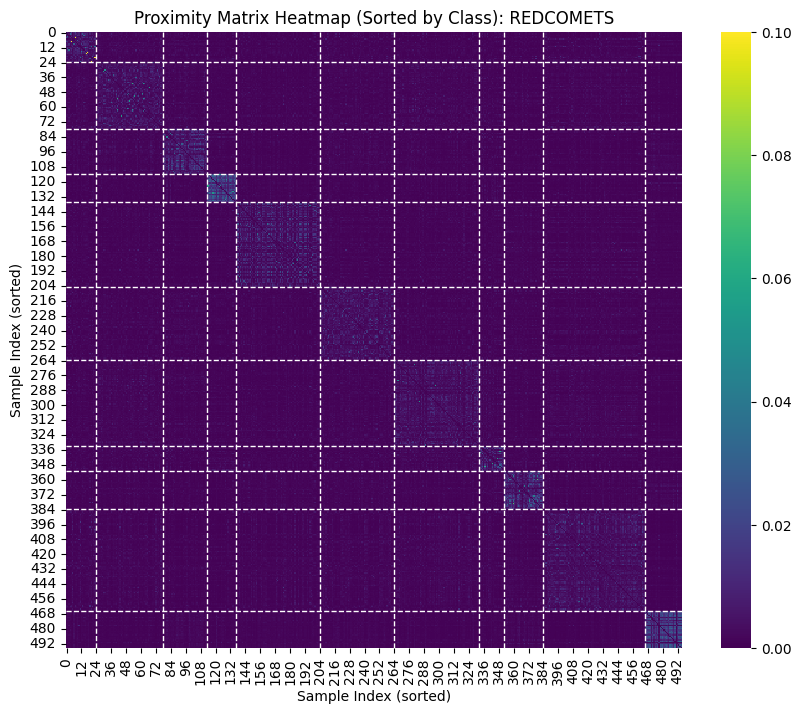


--- Rocket ---
Matrix shape: (496, 496)


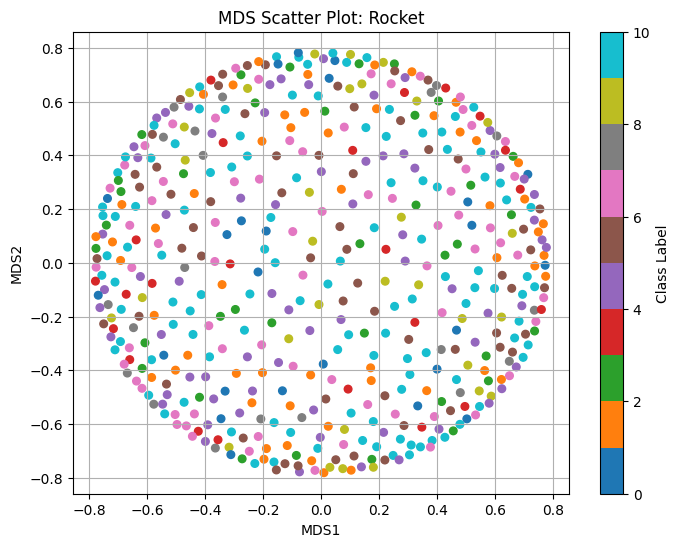

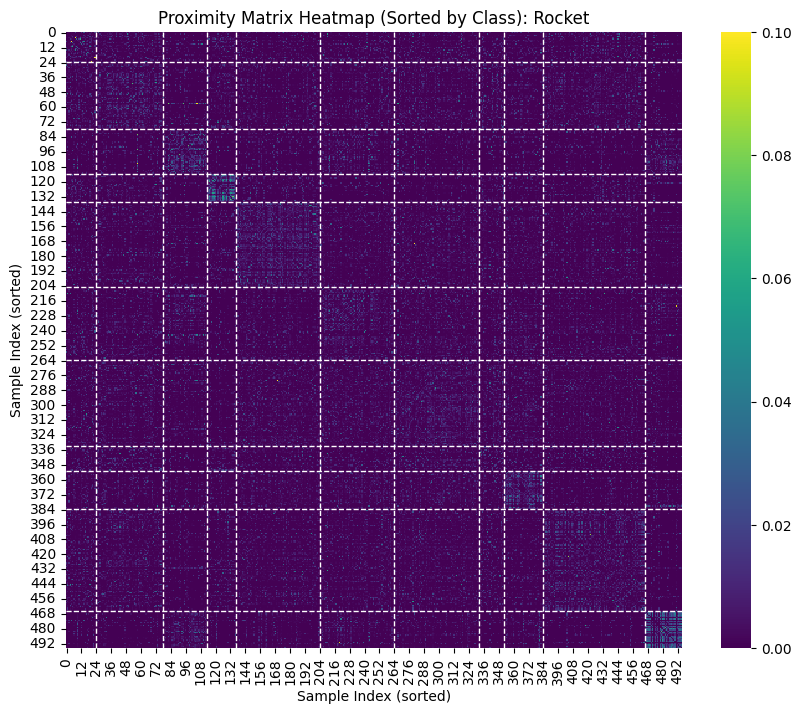


--- RDST ---
Matrix shape: (496, 496)


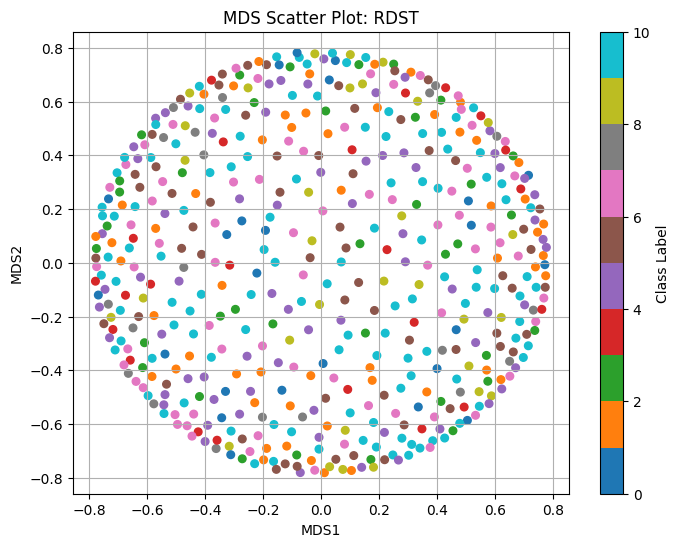

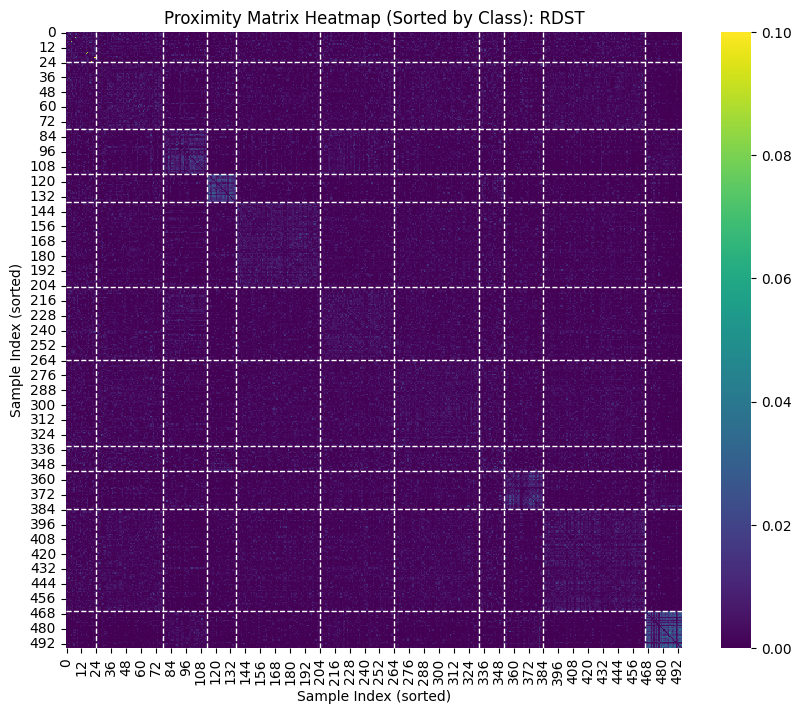


--- PF-GAP ---
Matrix shape: (496, 496)


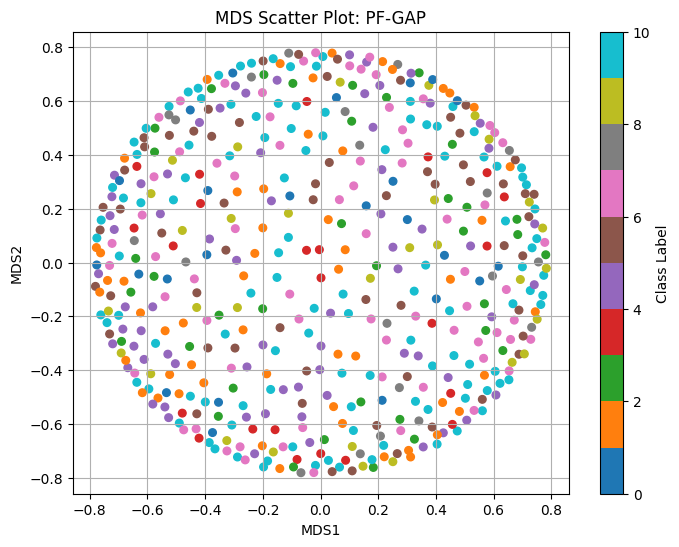

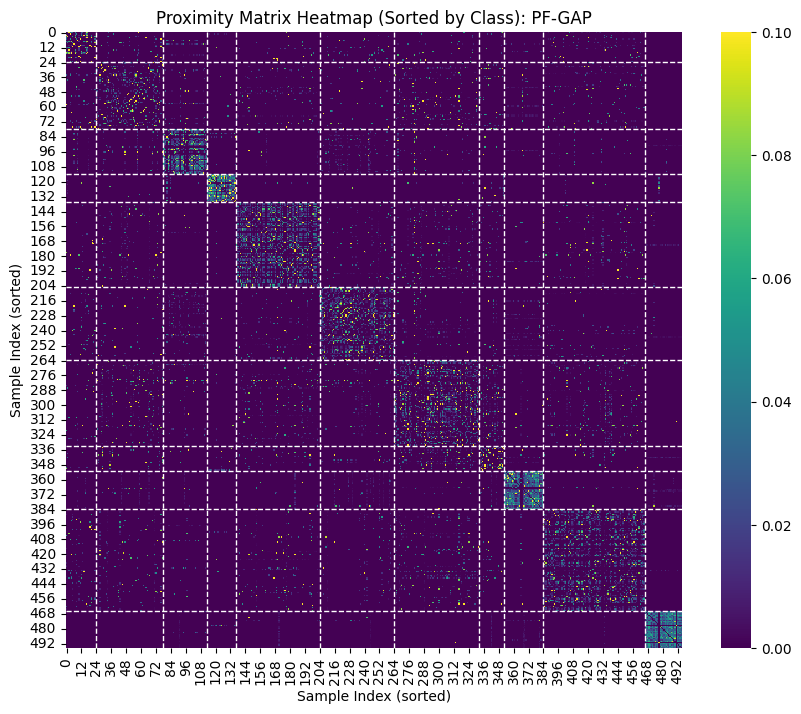


--- FreshPrince ---
Matrix shape: (496, 496)


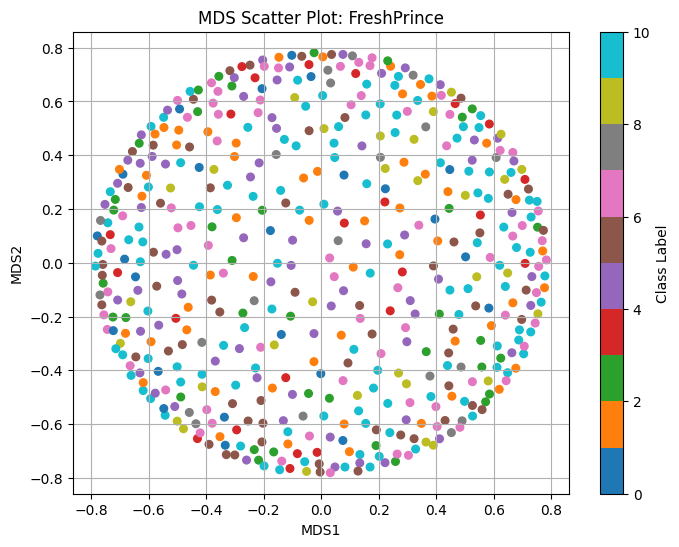

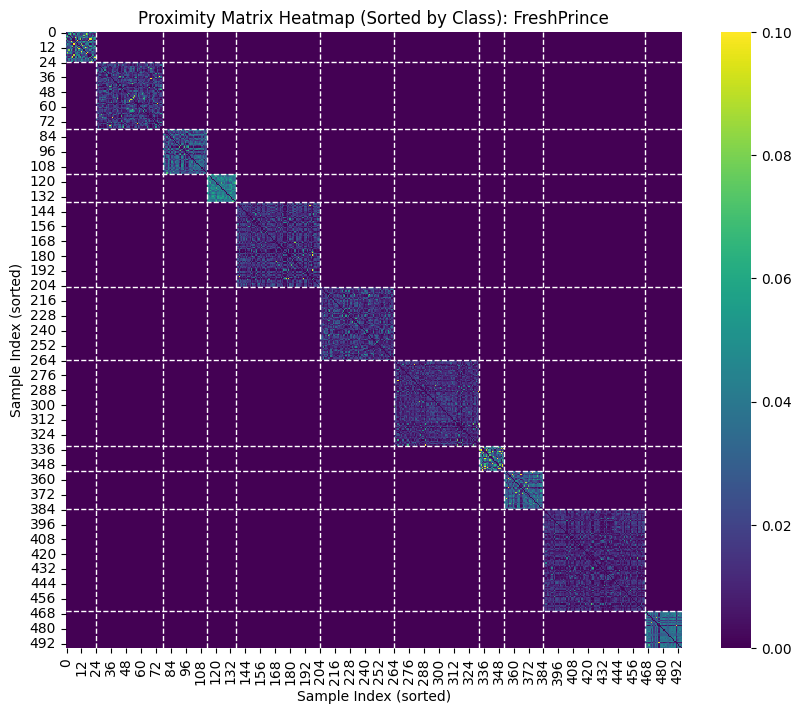

In [ ]:
# List of proximity files and their display names
prox_files = [
    ('../data/prox_files/quant_prox.npy', 'QGAP'),
    ('../data/prox_files/redcomets_prox.npy', 'REDCOMETS'),
    ('../data/prox_files/rocket_prox.npy', 'Rocket'),
    ('../data/prox_files/rdst_prox.npy', 'RDST'),
    ('../data/prox_files/pf_prox.npy', 'PF-GAP'),
    ('../data/prox_files/fresh_prince_prox.npy', 'FreshPrince'),
    #('../data/prox_files/dtw_matrix.npy', 'DTW'),
]
labels_file = '../data/labels.csv'
labels = pd.read_csv(labels_file).values.flatten()

# Function to load and symmetrize a proximity matrix
def load_and_symmetrize(path):
    mat = np.load(path)
    return (mat + mat.T) / 2

# Function to plot MDS scatter

def mds_scatter(dist_matrix, labels, title="MDS Scatter Plot"):
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    coords = mds.fit_transform(1 - dist_matrix)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab10', s=30)
    plt.title(title)
    plt.xlabel("MDS1")
    plt.ylabel("MDS2")
    plt.colorbar(scatter, label="Class Label")
    plt.grid(True)
    plt.show()

def phate_scatter(dist_matrix, labels, title="PHATE Scatter Plot"):
    import phate
    phate_operator = phate.PHATE(n_components=2, knn=5, random_state=42, verbose=False)
    coords = phate_operator.fit_transform(1 - dist_matrix)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab10', s=30)
    plt.title(title)
    plt.xlabel("PHATE1")
    plt.ylabel("PHATE2")
    plt.colorbar(scatter, label="Class Label")
    plt.grid(True)
    plt.show()

# Function to plot UMAP scatter
def umap_scatter(dist_matrix, labels, title="UMAP Scatter Plot"):
    import umap
    reducer = umap.UMAP(n_components=2, metric="precomputed", random_state=42)
    coords = reducer.fit_transform(1 - dist_matrix)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab10', s=30)
    plt.title(title)
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.colorbar(scatter, label="Class Label")
    plt.grid(True)
    plt.show()

# Function to plot heatmap sorted by class
def heatmap_sorted(dist_matrix, labels, title="Proximity Matrix Heatmap (Sorted by Class)"):
    sort_idx = np.argsort(labels)
    sorted_matrix = dist_matrix[sort_idx][:, sort_idx]
    sorted_labels = labels[sort_idx]
    sorted_matrix = np.clip(sorted_matrix, 0, 0.1) 
    plt.figure(figsize=(10, 8))
    sns.heatmap(sorted_matrix, cmap='viridis', square=True, cbar=True)
    plt.title(title)
    plt.xlabel("Sample Index (sorted)")
    plt.ylabel("Sample Index (sorted)")

    # Find indices where the class changes
    class_change_indices = np.where(np.diff(sorted_labels) != 0)[0] + 1
    for idx in class_change_indices:
        plt.axvline(idx, color='white', linestyle='--', linewidth=1)
        plt.axhline(idx, color='white', linestyle='--', linewidth=1)

    plt.show()

# Loop through all proximity files and visualize
for path, name in prox_files:
    try:
        mat = load_and_symmetrize(path)
        print(f"\n--- {name} ---")
        print(f"Matrix shape: {mat.shape}")

        mds_scatter(mat, labels, title=f"MDS Scatter Plot: {name}")
        phate_scatter(mat, labels, title=f"PHATE Scatter Plot: {name}")
        umap_scatter(mat, labels, title=f"UMAP Scatter Plot: {name}")
        heatmap_sorted(mat, labels, title=f"Proximity Matrix Heatmap (Sorted by Class): {name}")
    except Exception as e:
        print(f"Could not process {name}: {e}")

---

**Instructions:**
- To visualize a different proximity matrix, change the `prox_file` path in the code above.
- Ensure the labels file matches the order of the proximity matrix rows.